In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import perceptron as fp
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target.T
y[y[:]==2] = 1
y = y.reshape(-1,1)
data = np.append(X,y,1)

In [3]:
train, test = fp.train_test_balanceados(data, train_v=0.7)

In [4]:
wt, evel = fp.trainperceptron(train[:,:-1], train[:, -1], 0.001, 0.001, 100)

In [5]:
y_pred = fp.yperceptron(test[:,:-1], wt)

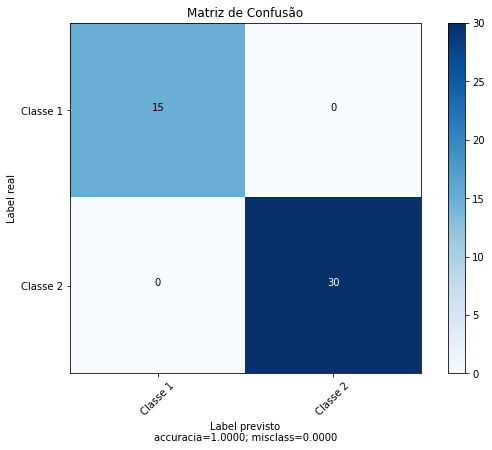

In [6]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test[:,-1], y_pred)
fp.plot_confusion_matrix(conf_mat, ['Classe 1', 'Classe 2'], title='Matriz de Confusão', cmap='Blues', normalize = False)

In [7]:
erro = []
for i in range(100):
    train, test = fp.train_test_balanceados(data, train_v=0.7)
    wt, evel = fp.trainperceptron(train[:,:-1], train[:, -1], 0.001, 0.001, 100)
    y_pred = fp.yperceptron(test[:,:4], wt)
    
    certos = 0
    errados = 0

    for classe_prevista, classe_real in zip(y_pred, test[:,-1]):
        if (classe_prevista == classe_real):
            certos += 1
        else:
            errados += 1
    
    erro.append(errados/(certos+errados)*100)

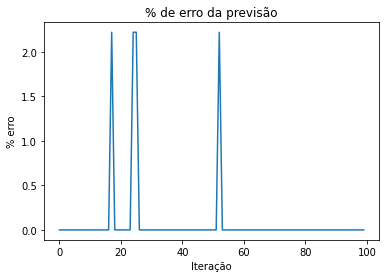

In [8]:
plt.plot(erro)
plt.title('% de erro da previsão')
plt.ylabel('% erro')
plt.xlabel('Iteração')
plt.show()